In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [1]:
!pwd

/Users/karan.verma/com5101m/final_assesment


In [10]:
df = pd.read_csv("anneal.data")
df_copy = pd.read_csv("anneal.data")
df.replace("?", np.nan, inplace=True)

In [7]:
df.head()

,family,product_type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non_ageing,...,s,p,shape,thick,width,len,oil,bore,packing,target
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3


In [9]:
missing_means = df.isnull().mean()
missing_means[missing_means<0.7]

product_type       0.000000
steel              0.087719
carbon             0.000000
hardness           0.000000
condition          0.339599
formability        0.354637
strength           0.000000
surface_quality    0.271930
shape              0.000000
thick              0.000000
width              0.000000
len                0.000000
bore               0.000000
target             0.000000
dtype: float64

## Impute condition attribute for target 2, 3, 5, U

In [11]:
df_copy[["condition", "target"]].groupby("target").value_counts()

target  condition
1       ?              8
2       S             71
        ?             17
3       S            422
        ?            169
        A             17
5       ?             43
        A             15
        S              2
U       ?             34
dtype: int64

In [4]:
usefull_df = df[df.columns[df.isnull().mean() < 0.25]]

In [5]:
usefull_df.target.value_counts()

3    608
2     88
5     60
U     34
1      8
Name: target, dtype: int64

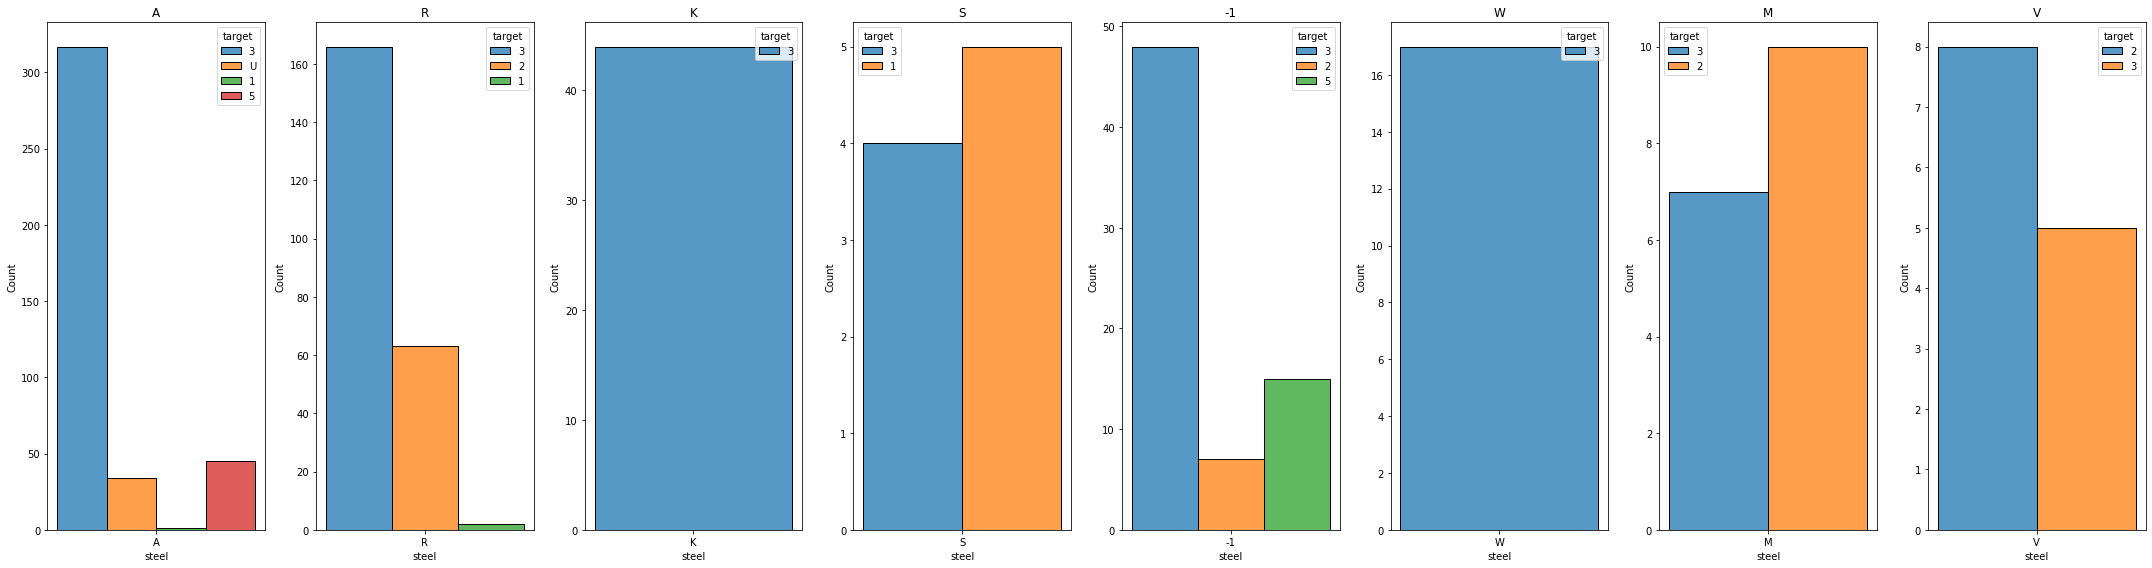

In [53]:
fig, axs = pyplot.subplots(1, 8, figsize=(30, 8))

for i, value in enumerate(usefull_df.steel.unique()):
    sns.histplot(data=usefull_df[usefull_df.steel == value], x="steel", hue="target",  multiple="dodge", ax=axs[i])
    axs[i].title.set_text(value)
fig.tight_layout()

In [9]:
usefull_df["steel"] = usefull_df[["steel", "target"]].groupby("target").transform(lambda x: x.fillna(x.mode()))

<ipython-input-9-5d2b6f895a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usefull_df["steel"] = usefull_df[["steel", "target"]].groupby("target").transform(lambda x: x.fillna(x.mode()))


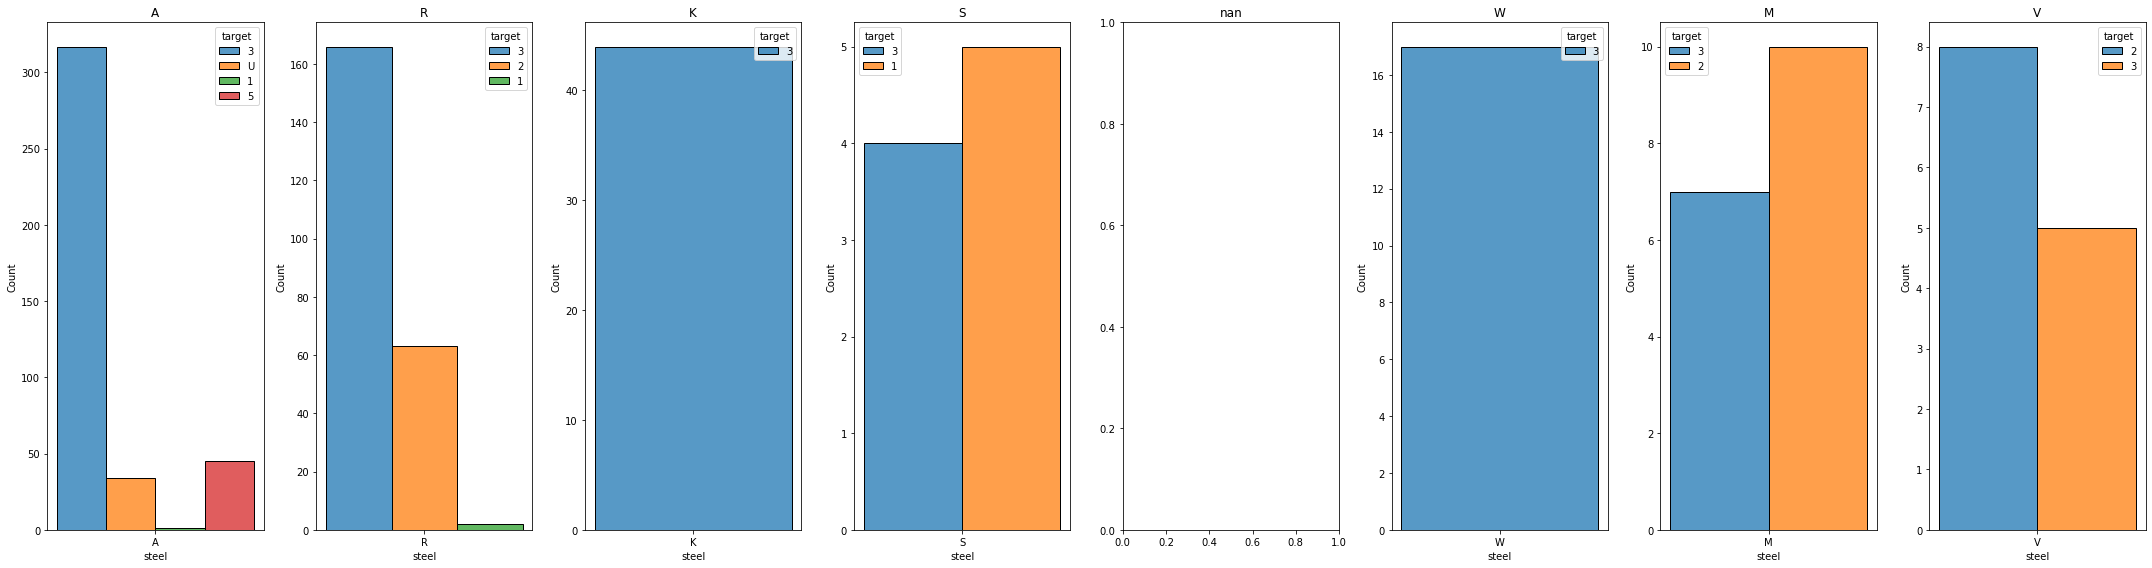

In [10]:
fig, axs = pyplot.subplots(1, 8, figsize=(30, 8))

for i, value in enumerate(usefull_df.steel.unique()):
    sns.histplot(data=usefull_df[usefull_df.steel == value], x="steel", hue="target",  multiple="dodge", ax=axs[i])
    axs[i].title.set_text(value)
fig.tight_layout()

In [11]:
usefull_df.shape

(798, 11)

In [19]:
# target 3 vs all.

In [20]:
usefull_df3 = usefull_df.copy()

In [21]:
usefull_df3["target"] = usefull_df3.target.apply(lambda x: 1 if x == "3" else 0)

In [22]:
usefull_df3["target"].value_counts()

1    608
0    190
Name: target, dtype: int64

In [23]:
usefull_df3

,product_type,steel,carbon,hardness,strength,shape,thick,width,len,bore,target
0,C,A,8,0,0,COIL,0.700,610.0,0,0,1
1,C,R,0,0,0,COIL,3.200,610.0,0,0,1
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,1
3,C,A,0,60,0,COIL,2.801,385.1,0,0,1
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,1
...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,0,COIL,1.001,50.0,0,0,1
794,C,NaN,0,0,0,SHEET,0.699,1300.0,4880,0,1
795,C,A,0,0,0,COIL,0.400,609.9,0,0,1
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,1


<AxesSubplot:xlabel='target', ylabel='Count'>

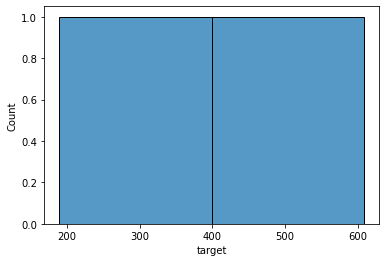

In [54]:
sns.histplot(data=usefull_df3["target"].value_counts())

In [55]:
usefull_df3.groupby("target").carbon.value_counts()

target  carbon
0       0         187
        10          2
        3           1
1       0         543
        55         17
        65         14
        45         13
        6          11
        4           4
        70          4
        8           2
Name: carbon, dtype: int64

In [59]:
sorted(usefull_df.carbon.unique())

[0, 3, 4, 6, 8, 10, 45, 55, 65, 70]

In [60]:
usefull_df3.groupby("target").hardness.value_counts()

target  hardness
0       0           158
        85           30
        80            2
1       0           482
        45           53
        50           31
        60           23
        70           17
        80            2
Name: hardness, dtype: int64

In [61]:

usefull_df3.groupby("target").strength.value_counts()

target  strength
0       0           166
        600          10
        500           7
        400           4
        300           2
        700           1
1       0           575
        310          17
        500           9
        350           7
Name: strength, dtype: int64

In [63]:
usefull_df3.groupby("target").len.value_counts()

target  len 
0       0        73
        762      28
        4880     28
        612      17
        4170     11
        761       7
        1         5
        611       4
        1220      4
        3000      4
        301       3
        881       3
        150       2
        300       1
1       0       298
        762     123
        4880    117
        4170     17
        761      15
        612      14
        150       4
        269       2
        270       2
        300       2
        301       2
        759       2
        760       2
        1000      2
        400       1
        610       1
        611       1
        614       1
        3000      1
        4120      1
Name: len, dtype: int64

<AxesSubplot:xlabel='carbon', ylabel='Density'>

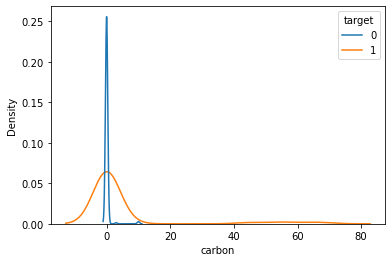

In [66]:
sns.kdeplot(usefull_df3.carbon, hue=usefull_df3.target)

/Users/karan.verma/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carbon'>

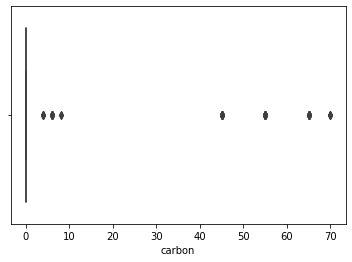

In [69]:
sns.boxplot(usefull_df3.carbon[usefull_df3.target==1])